In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
from IPython.display import display
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df = pd.read_csv("AR_cleaned_ISB_aging_new_merge_fi_wgcna.csv")

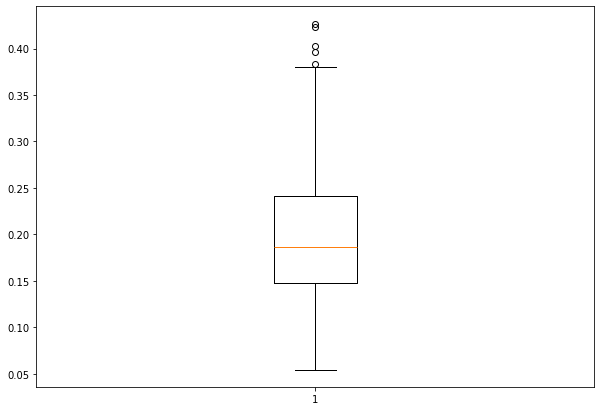

In [13]:
data = df['merge_fi']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [14]:
cutoff = df['merge_fi'].quantile(0.75)
print('Cutoff:', cutoff)

df['merge_fi_class'] = (df['merge_fi'] > cutoff).astype(int)

merge_cats = df['merge_fi_class'].value_counts()
print(merge_cats)

Cutoff: 0.241414141
merge_fi_class
0    577
1    192
Name: count, dtype: int64


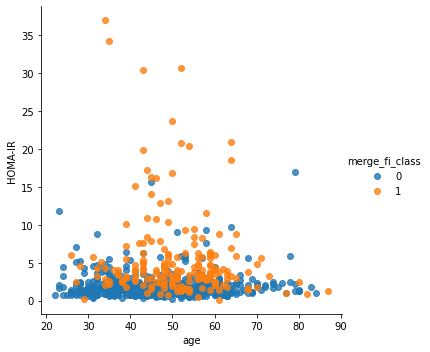

In [15]:
sns.lmplot(x='age',
           y='HOMA-IR',
           hue='merge_fi_class',
           data=df,
           fit_reg=False)
plt.show()

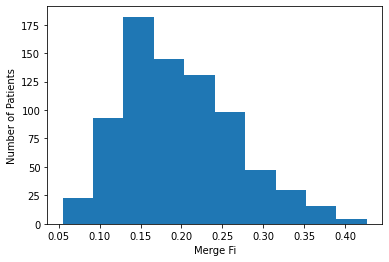

In [16]:
plt.hist(df['merge_fi'])
plt.xlabel('Merge Fi')
plt.ylabel('Number of Patients')
# plt.title('')
plt.grid(False)
plt.show()

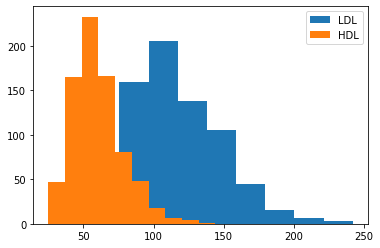

In [17]:
plt.hist(df["LDL-CHOL CALCULATION"].dropna().tolist(), label="LDL")
plt.hist(df["HDL CHOL DIRECT"].dropna().tolist(), label="HDL")
plt.legend()

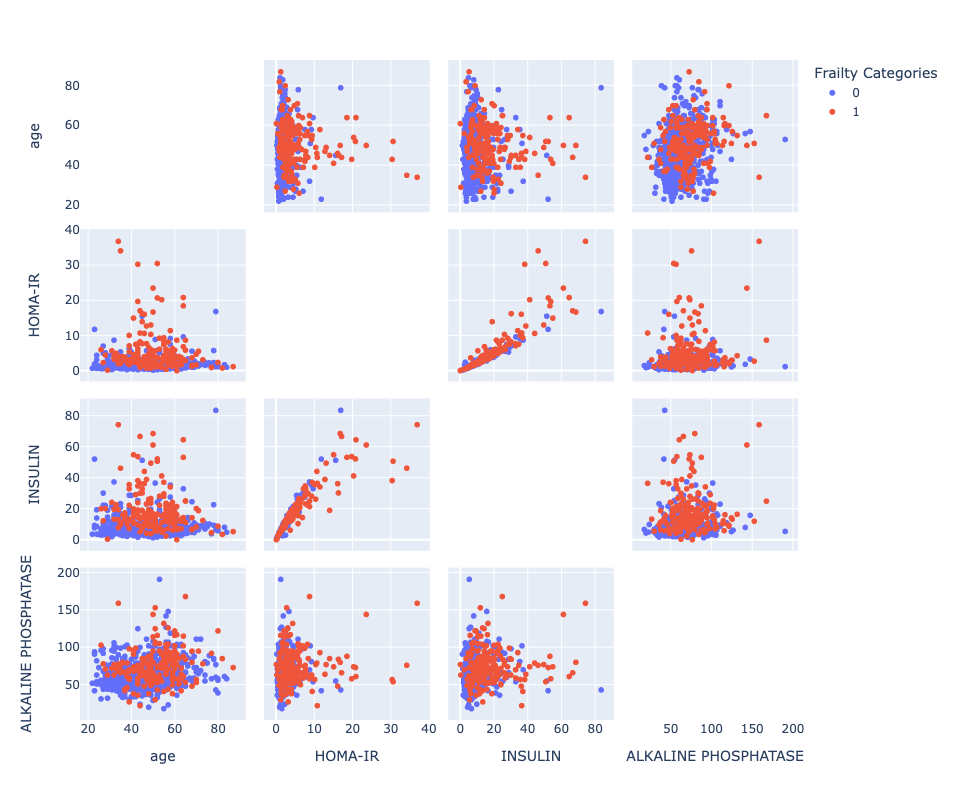

In [18]:
filtered_df = df[['age', 'HOMA-IR', 'INSULIN', 'ALKALINE PHOSPHATASE', 'merge_fi_class']]
variables = ['age', 'HOMA-IR', 'INSULIN', 'ALKALINE PHOSPHATASE']

color_discrete_map = {0: 'blue', 1: 'red'}

fig = px.scatter_matrix(
    filtered_df,
    dimensions=variables,
    color='merge_fi_class',
    symbol='merge_fi_class',
    color_discrete_map=color_discrete_map, 
    labels={'merge_fi_class': 'Class'},  
    # title='Scatter matrix of features by merge_fi_class'
)
fig.update_layout(coloraxis_showscale=False)
fig.update_traces(diagonal_visible=False, marker=None)

fig.update_layout(
    autosize=False,
    width=1000, 
    height=800,
    legend_title_text="Frailty Categories"
)

fig.show()